## 2022 Predict Ideology of Media Organizations from Tweets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.text.all import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from ideology_utils import *

### Download New Tweets

In [6]:
group = get_tweets_of_group("handles_media.csv", "media")

OccupyDemocrats.csv
BBC.csv
MSNBC.csv
npr.csv
TheAtlantic.csv
AddInfoOrg.csv
HuffPost.csv
voxdotcom.csv
Slate.csv
nytimes.csv
politico.csv
ABC.csv
cnn.csv
NaturalNewsHR.csv
Minutes waiting: 0
Minutes waiting: 1
Minutes waiting: 2
Minutes waiting: 3
Minutes waiting: 4
Minutes waiting: 5
Minutes waiting: 6
Minutes waiting: 7
Minutes waiting: 8
Minutes waiting: 9
Minutes waiting: 10
Minutes waiting: 11
Minutes waiting: 12
Minutes waiting: 13
Minutes waiting: 14
NBCNews.csv
AP.csv
wsj.csv
BreitbartNews.csv
TheFiscalTimes.csv
washingtonpost.csv
TheEconomist.csv
DailyCaller.csv
theblaze.csv
Minutes waiting: 0
Minutes waiting: 1
Minutes waiting: 2
Minutes waiting: 3
Minutes waiting: 4
Minutes waiting: 5
Minutes waiting: 6
Minutes waiting: 7
Minutes waiting: 8
Minutes waiting: 9
Minutes waiting: 10
Minutes waiting: 11
Minutes waiting: 12
Minutes waiting: 13
Minutes waiting: 14
guardian.csv
redstate.csv
nypost.csv
nro.csv
foxnews.csv
Minutes waiting: 0
Minutes waiting: 1
Minutes waiting: 2
Minu

### Score Tweets and Pickle Scores

In [29]:
model = "ulmfit-2022.pkl"
learn = load_learner(model)

In [28]:
group.ls()

(#30) [Path('tweets/tweets-media-2022-06-12/TheEconomist.csv'),Path('tweets/tweets-media-2022-06-12/foxnews.csv'),Path('tweets/tweets-media-2022-06-12/BBC.csv'),Path('tweets/tweets-media-2022-06-12/TheFiscalTimes.csv'),Path('tweets/tweets-media-2022-06-12/BreitbartNews.csv'),Path('tweets/tweets-media-2022-06-12/AddInfoOrg.csv'),Path('tweets/tweets-media-2022-06-12/AP.csv'),Path('tweets/tweets-media-2022-06-12/NaturalNewsHR.csv'),Path('tweets/tweets-media-2022-06-12/nytimes.csv'),Path('tweets/tweets-media-2022-06-12/theblaze.csv')...]

In [31]:
scores = {}
for g in group.ls():
    try:
        handle, s1, s2, n = ideology_score(g, model)
        scores[handle] = [s1,s2,n]
        print([handle,s1,s2,n])
    except:
        continue

['voxdotcom', 0.27, 0.28, 131]


['BreitbartNews', 0.67, 0.68, 286]
empty: tweets/tweets-media-2022-06-12/NaturalNewsHR.csv


['nytimes', 0.31, 0.34, 570]
empty: tweets/tweets-media-2022-06-12/TheFiscalTimes.csv


['MSNBC', 0.51, 0.52, 348]


['foxnews', 0.64, 0.64, 1000]


['nro', 0.77, 0.76, 276]
empty: tweets/tweets-media-2022-06-12/BBC.csv


['HuffPost', 0.4, 0.42, 434]


['ABC', 0.41, 0.43, 678]


['redstate', 0.78, 0.77, 371]


['cnn', 0.4, 0.42, 582]


['politico', 0.38, 0.41, 117]


['nypost', 0.69, 0.65, 1000]


['AP', 0.37, 0.39, 413]


['TheAtlantic', 0.37, 0.39, 215]


['TheEconomist', 0.46, 0.48, 698]


['guardian', 0.52, 0.52, 1000]


['npr', 0.28, 0.31, 298]


['wsj', 0.4, 0.42, 664]
empty: tweets/tweets-media-2022-06-12/AddInfoOrg.csv


['washingtonpost', 0.39, 0.41, 510]


['OccupyDemocrats', 0.55, 0.54, 150]


['Reuters', 0.66, 0.63, 1000]


['NBCNews', 0.4, 0.42, 560]


['DailyCaller', 0.91, 0.86, 415]


['Slate', 0.47, 0.48, 587]
empty: tweets/tweets-media-2022-06-12/InfoWarsMedia.csv


['theblaze', 0.65, 0.66, 272]


In [9]:
fn_pickle = f'scores-{group.name}.pickle'
fn_pickle

'scores-tweets-media-2022-06-12.pickle'

In [10]:
pd.to_pickle(scores,fn_pickle)

### UnPickle Tweets 

In [186]:
scores = pd.read_pickle(fn_pickle)

In [187]:
scores

{'cnn': [0.4, 0.42, 582],
 'wsj': [0.4, 0.42, 664],
 'foxnews': [0.64, 0.64, 1000],
 'nypost': [0.69, 0.65, 1000],
 'DailyCaller': [0.91, 0.86, 415],
 'TheEconomist': [0.46, 0.48, 698],
 'voxdotcom': [0.27, 0.28, 131],
 'politico': [0.38, 0.41, 117],
 'BreitbartNews': [0.67, 0.68, 286],
 'nytimes': [0.31, 0.34, 570],
 'washingtonpost': [0.39, 0.41, 510],
 'TheAtlantic': [0.37, 0.39, 215],
 'redstate': [0.78, 0.77, 371],
 'MSNBC': [0.51, 0.52, 348],
 'HuffPost': [0.4, 0.42, 434],
 'npr': [0.28, 0.31, 298],
 'Reuters': [0.66, 0.63, 1000],
 'Slate': [0.47, 0.48, 587],
 'OccupyDemocrats': [0.55, 0.54, 150],
 'nro': [0.77, 0.76, 276],
 'ABC': [0.41, 0.43, 678],
 'theblaze': [0.65, 0.66, 272],
 'AP': [0.37, 0.39, 413],
 'NBCNews': [0.4, 0.42, 560],
 'guardian': [0.52, 0.52, 1000]}

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

### Ideology Score of Media Organizations

In [190]:
df = scores2df(scores,'s1')

#### 0 is progressive, 1 is conservative

<AxesSubplot:ylabel='handle'>

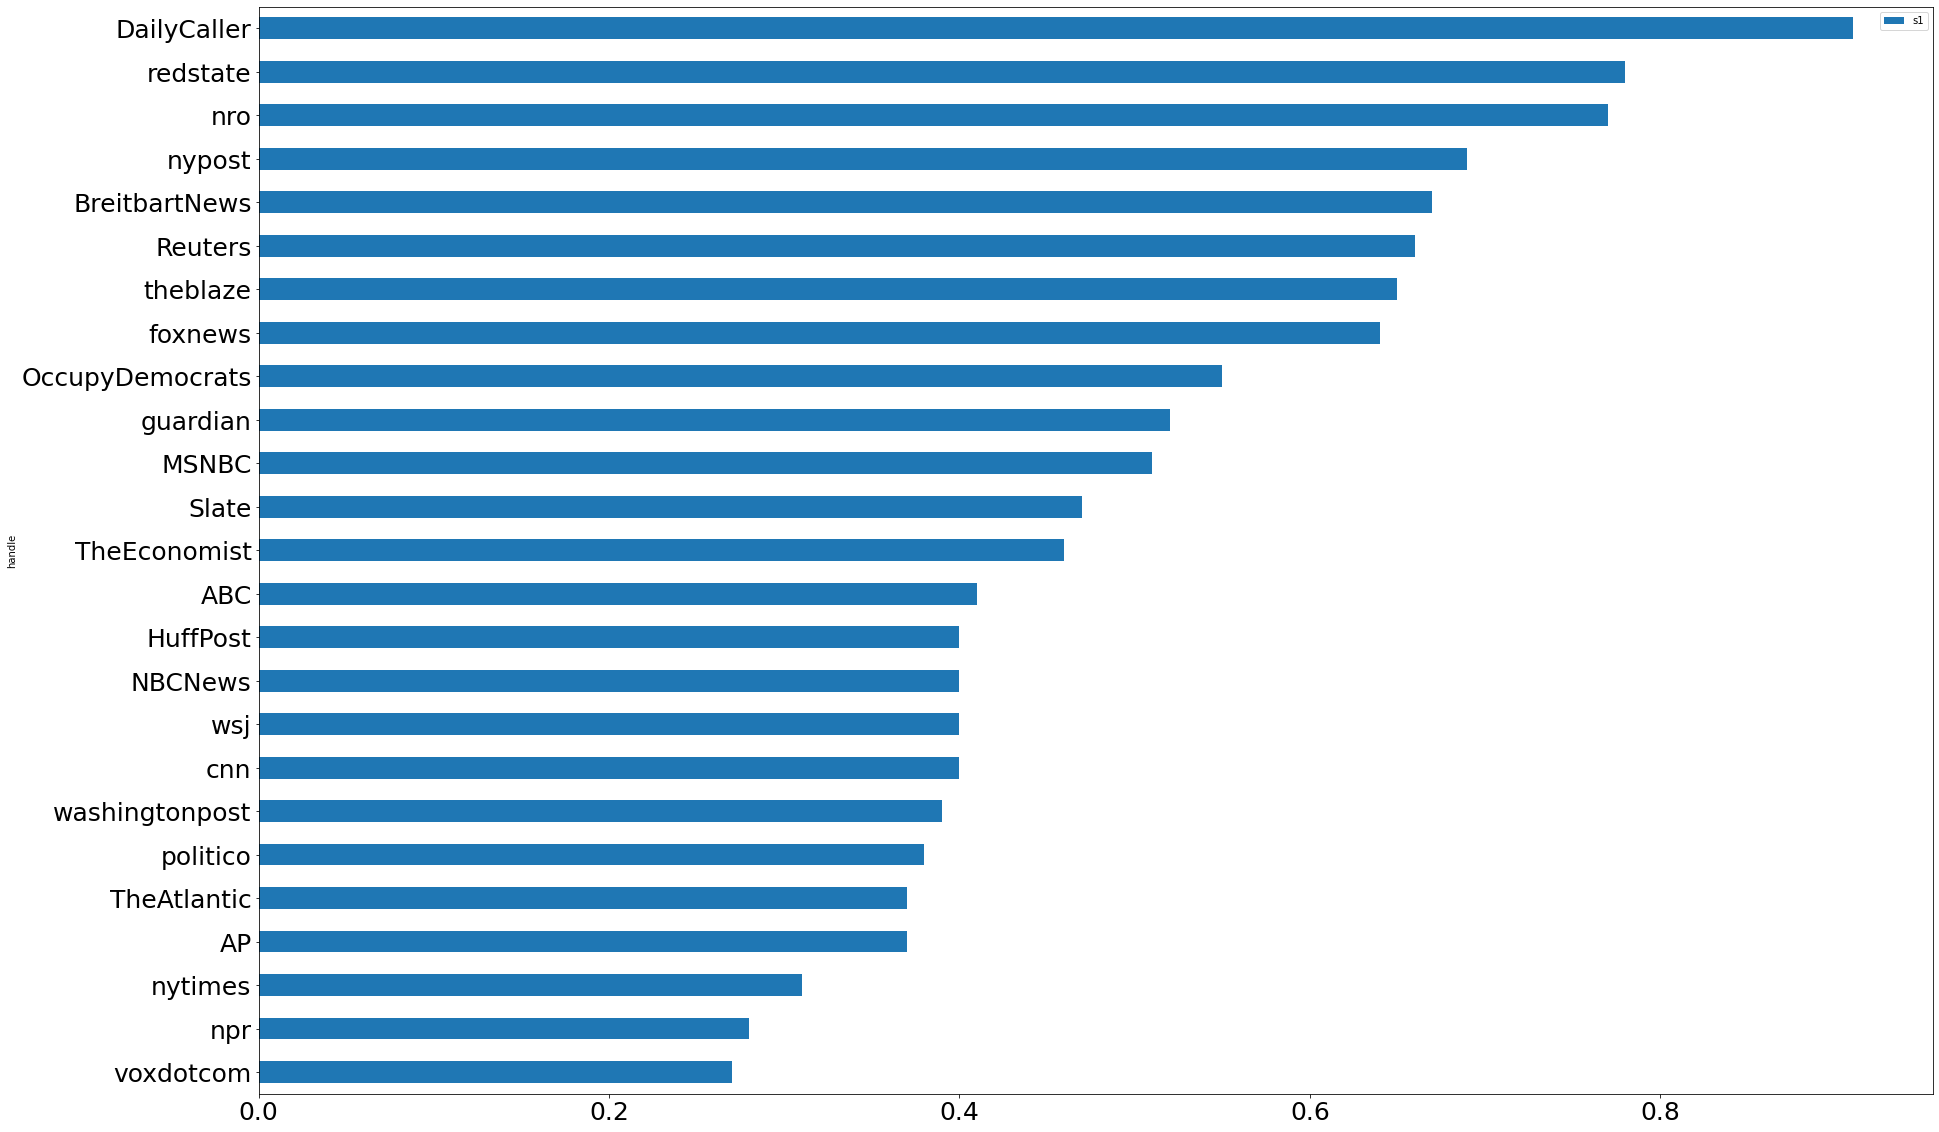

In [191]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)

### Ideology of Media Organizations using Transformers Model `blue-or-red-roberta-2022`

In [75]:
trainer,tokz = load_tfms_model()

In [180]:
scores = {}
for g in group.ls():
    try:
        df = preprocess_tweets(tweets2df(g))
        handle = df.handle[0]
        ds_eval = df2ds(df, tokz)
        preds = predict_tfms_trainer(ds_eval, trainer)
        n = len(preds)
        s1  = round(sum(np.argmax(preds.numpy(),axis=1))/len(preds),2)
        d,r = sum(preds.numpy())/n
        s2  = round(r,2)
        scores[handle] = [s1,s2,n]
        print([handle,s1,s2,n])
    except:
        continue
scores_tfms = scores

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 698
  Batch size = 512


['TheEconomist', 0.52, 0.5, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 512


['foxnews', 0.59, 0.59, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 286
  Batch size = 512


['BreitbartNews', 0.62, 0.62, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 413
  Batch size = 512


['AP', 0.23, 0.23, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 570
  Batch size = 512


['nytimes', 0.25, 0.27, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 272
  Batch size = 512


['theblaze', 0.57, 0.59, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 512


['Reuters', 0.5, 0.49, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 587
  Batch size = 512


['Slate', 0.45, 0.45, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 512


['guardian', 0.42, 0.43, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 678
  Batch size = 512


['ABC', 0.28, 0.29, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 560
  Batch size = 512


['NBCNews', 0.29, 0.3, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 215
  Batch size = 512


['TheAtlantic', 0.44, 0.45, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 510
  Batch size = 512


['washingtonpost', 0.37, 0.37, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 664
  Batch size = 512


['wsj', 0.39, 0.4, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 582
  Batch size = 512


['cnn', 0.29, 0.31, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 371
  Batch size = 512


['redstate', 0.71, 0.71, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 512


['nypost', 0.5, 0.5, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 276
  Batch size = 512


['nro', 0.74, 0.74, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 150
  Batch size = 512


['OccupyDemocrats', 0.31, 0.32, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 131
  Batch size = 512


['voxdotcom', 0.31, 0.35, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 298
  Batch size = 512


['npr', 0.22, 0.26, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 117
  Batch size = 512


['politico', 0.35, 0.38, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 434
  Batch size = 512


['HuffPost', 0.34, 0.34, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 415
  Batch size = 512


['DailyCaller', 0.67, 0.65, 272]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: handle, input. If handle, input are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 348
  Batch size = 512


['MSNBC', 0.42, 0.43, 272]


In [181]:
scores_tfms

{'TheEconomist': [0.52, 0.5, 272],
 'foxnews': [0.59, 0.59, 272],
 'BreitbartNews': [0.62, 0.62, 272],
 'AP': [0.23, 0.23, 272],
 'nytimes': [0.25, 0.27, 272],
 'theblaze': [0.57, 0.59, 272],
 'Reuters': [0.5, 0.49, 272],
 'Slate': [0.45, 0.45, 272],
 'guardian': [0.42, 0.43, 272],
 'ABC': [0.28, 0.29, 272],
 'NBCNews': [0.29, 0.3, 272],
 'TheAtlantic': [0.44, 0.45, 272],
 'washingtonpost': [0.37, 0.37, 272],
 'wsj': [0.39, 0.4, 272],
 'cnn': [0.29, 0.31, 272],
 'redstate': [0.71, 0.71, 272],
 'nypost': [0.5, 0.5, 272],
 'nro': [0.74, 0.74, 272],
 'OccupyDemocrats': [0.31, 0.32, 272],
 'voxdotcom': [0.31, 0.35, 272],
 'npr': [0.22, 0.26, 272],
 'politico': [0.35, 0.38, 272],
 'HuffPost': [0.34, 0.34, 272],
 'DailyCaller': [0.67, 0.65, 272],
 'MSNBC': [0.42, 0.43, 272]}

In [184]:
df = scores2df(scores_tfms,'s1')

#### 0 is progressive, 1 is conservative

<AxesSubplot:ylabel='handle'>

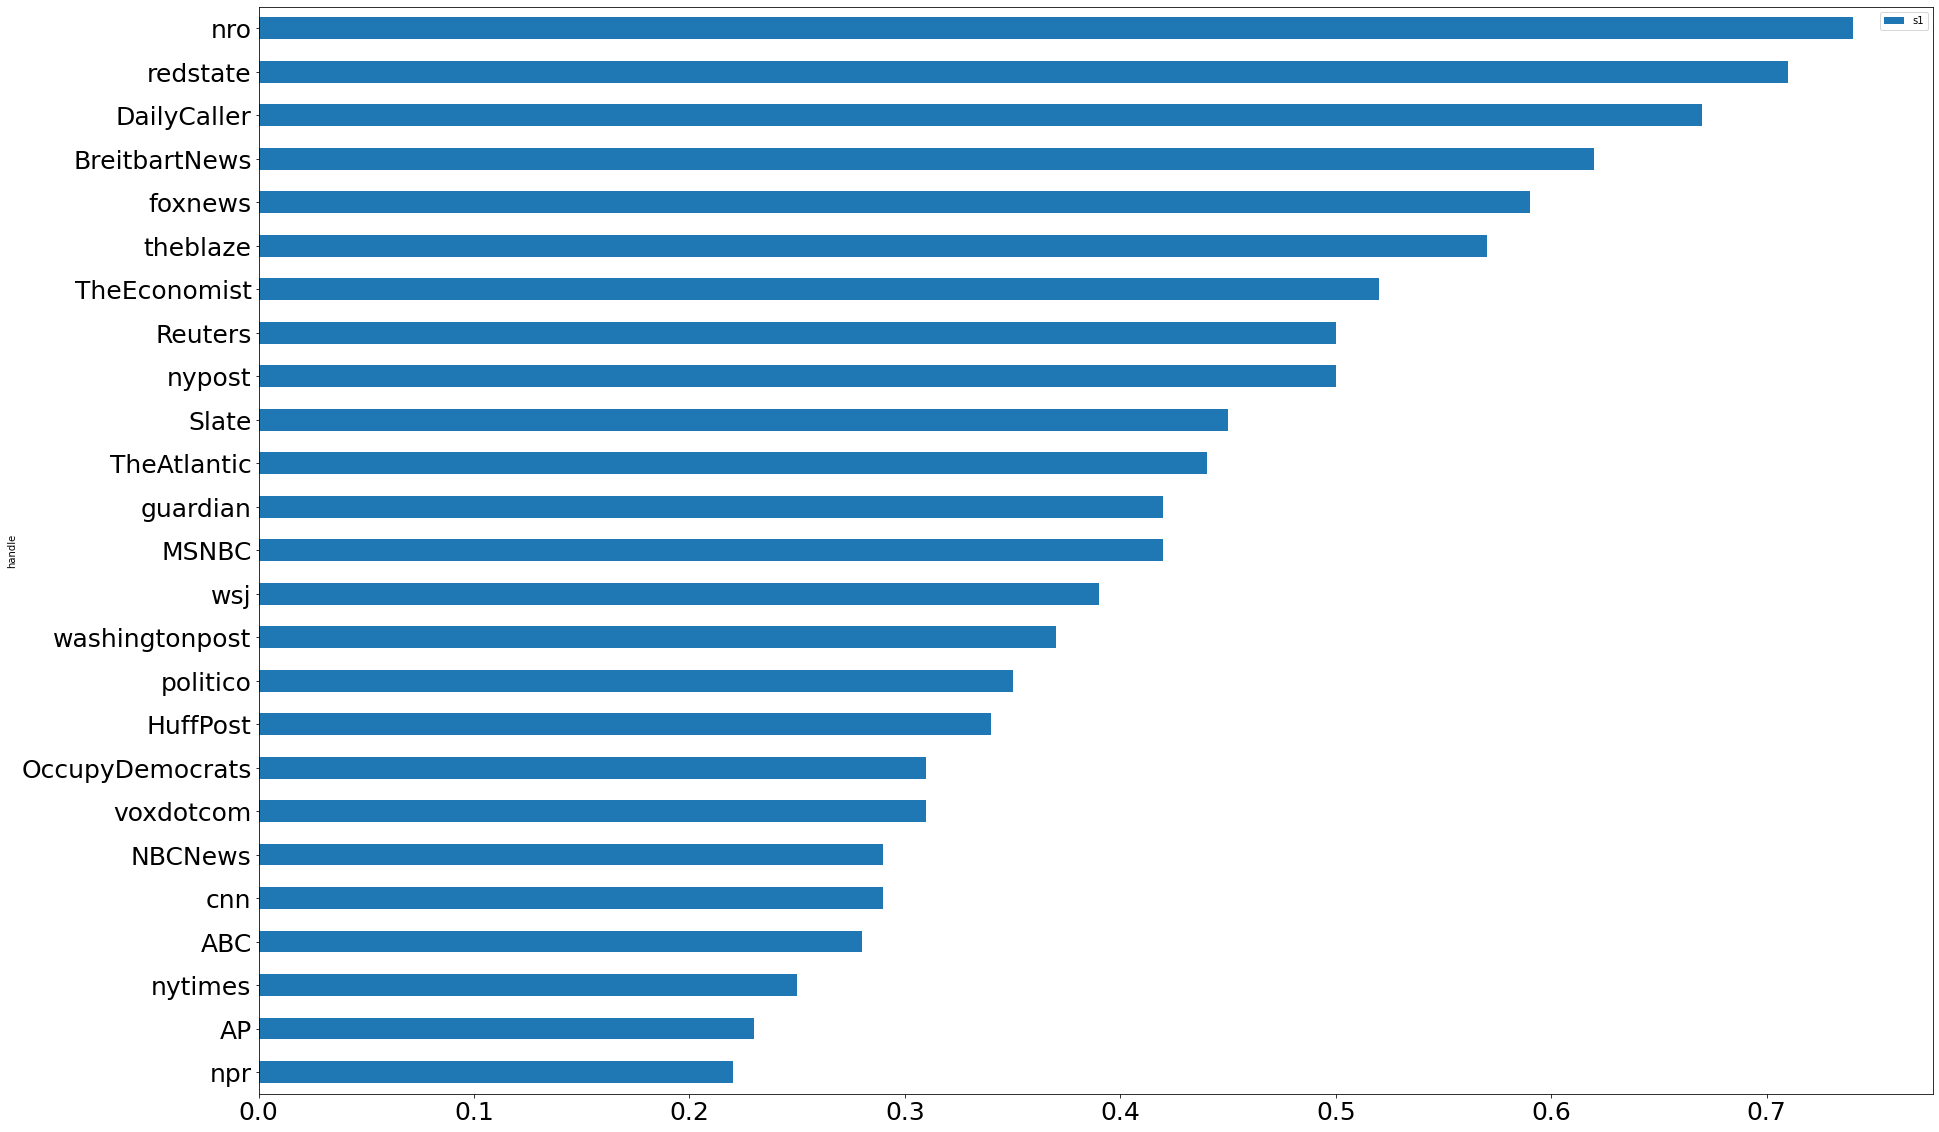

In [185]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)